In [4]:
import os
import numpy as np
import cv2
import pandas as pd
import csv
import os
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras import layers, Sequential

In [ ]:
#!pip install git+https://github.com/tensorflow/docs
#! pip install tensorflow --upgrade

In [5]:
from tensorflow import keras

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import cv2
import os

In [65]:
# Specify the directory where your CSV files are located
directory_path = '/kaggle/input/dcsass-dataset/DCSASS Dataset/Labels'
videos_directory = '/kaggle/input/dcsass-dataset/DCSASS Dataset'

def prepareParentVideoPath(video_name):
    video_path = ""
    done = False
    for c in video_name:
        if(done and c == '_'):
            return video_path
        video_path += c
        if(c == '_'):
            done = True
    return ""
        
# Initialize empty lists to store video names and abnormal behaviors
video_paths = []
labels = []

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)

        # Open the CSV file and read its contents
        with open(file_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Skip the header if it exists
            next(csv_reader, None)

            # Iterate over each row in the CSV file
            for row in csv_reader:
                # Assuming the first column is the video name and the second column is the abnormal behavior
                video_path = videos_directory + '/' + filename[:-4] + '/' + prepareParentVideoPath(row[0]) + '.mp4' + '/' + row[0] + '.mp4' #row[0]
                label = row[2]  # Convert the value to an integer
                behavior = ""
                if(label == '1'):
                    behavior = filename[:-4]
                elif(label == '0'):
                    behavior = "Normal"
                else:
                    continue
                # Append the values to the respective lists
                video_paths.append(video_path)
                labels.append(behavior)

In [66]:
data = {'Video Path': video_paths, 'Label': labels}
df = pd.DataFrame(data)

# Specify the test size (e.g., 0.2 for 20% test data)
test_size = 0.2


In [67]:
desired_rows_per_label = 10
test = df.groupby('Label').head(desired_rows_per_label)

print(test)

                                              Video Path     Label
0      /kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...    Normal
1      /kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...  Burglary
2      /kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...  Burglary
3      /kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...    Normal
4      /kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...  Burglary
...                                                  ...       ...
16369  /kaggle/input/dcsass-dataset/DCSASS Dataset/Fi...  Fighting
16370  /kaggle/input/dcsass-dataset/DCSASS Dataset/Fi...  Fighting
16371  /kaggle/input/dcsass-dataset/DCSASS Dataset/Fi...  Fighting
16385  /kaggle/input/dcsass-dataset/DCSASS Dataset/Fi...  Fighting
16412  /kaggle/input/dcsass-dataset/DCSASS Dataset/Fi...  Fighting

[140 rows x 2 columns]


In [69]:
test.shape

(140, 2)

In [70]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the 'Label' column
encoded_data = encoder.fit_transform(df[['Label']])

# Get the feature names after one-hot encoding
encoded_feature_names = encoder.get_feature_names_out(['Label'])

# Save the mapping to a DataFrame
mapping_df = pd.DataFrame({'Original_Category': encoded_feature_names,
                           'Encoded_Column': range(encoded_data.shape[1])})

# Display the mapping DataFrame
print("Mapping between 'Normal' and encoded values:")
print(mapping_df)

# Apply OneHotEncoder to the 'Label' column and append to the original DataFrame
df_encoded = pd.concat([df, pd.DataFrame(encoded_data.toarray(), columns=encoded_feature_names)], axis=1)

# Display the DataFrame with the one-hot encoded 'Label' column
print("\nDataFrame with One-Hot Encoded 'Label' column:")
print(df_encoded)


Mapping between 'Normal' and encoded values:
      Original_Category  Encoded_Column
0           Label_Abuse               0
1          Label_Arrest               1
2           Label_Arson               2
3         Label_Assault               3
4        Label_Burglary               4
5       Label_Explosion               5
6        Label_Fighting               6
7          Label_Normal               7
8   Label_RoadAccidents               8
9         Label_Robbery               9
10       Label_Shooting              10
11    Label_Shoplifting              11
12       Label_Stealing              12
13      Label_Vandalism              13

DataFrame with One-Hot Encoded 'Label' column:
                                              Video Path     Label  \
0      /kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...    Normal   
1      /kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...  Burglary   
2      /kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...  Burglary   
3      /kaggle/input/dcsass

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [74]:
data = encoder.fit_transform(test[['Label']]).toarray()
data_df = pd.DataFrame(data, columns=encoded_feature_names)
#test_encoded = pd.concat([test, data_df] , axis=1)
test_encoded = test.join(data_df)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [76]:
test_encoded.head()

,Video Path,Label,Label_Abuse,Label_Arrest,Label_Arson,Label_Assault,Label_Burglary,Label_Explosion,Label_Fighting,Label_Normal,Label_RoadAccidents,Label_Robbery,Label_Shooting,Label_Shoplifting,Label_Stealing,Label_Vandalism
0,/kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...,Burglary,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...,Burglary,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...,Burglary,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
train_df, test_df = train_test_split(df_encoded, test_size=test_size, random_state=42, shuffle=True)

In [42]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5120)])
  except RuntimeError as e:
    print(e)

In [29]:
# train_encoded_data = encoder.fit_transform(train_df[['Label']])
# train_df_encoded = pd.concat([train_df, pd.DataFrame(train_encoded_data.toarray(), columns=encoded_feature_names)], axis=1)
# train_df_encoded.drop('Label', axis=1, inplace=True)
train_df.isnull().sum()

Video Path             0
Label                  0
Label_Abuse            0
Label_Arrest           0
Label_Arson            0
Label_Assault          0
Label_Burglary         0
Label_Explosion        0
Label_Fighting         0
Label_Normal           0
Label_RoadAccidents    0
Label_Robbery          0
Label_Shooting         0
Label_Shoplifting      0
Label_Stealing         0
Label_Vandalism        0
dtype: int64

In [8]:
df_encoded.sample(10)

,Video Path,Label,Label_Abuse,Label_Arrest,Label_Arson,Label_Assault,Label_Burglary,Label_Explosion,Label_Fighting,Label_Normal,Label_RoadAccidents,Label_Robbery,Label_Shooting,Label_Shoplifting,Label_Stealing,Label_Vandalism
13120,/kaggle/input/dcsass-dataset/DCSASS Dataset/Ro...,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8639,/kaggle/input/dcsass-dataset/DCSASS Dataset/St...,Stealing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
355,/kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...,Burglary,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8338,/kaggle/input/dcsass-dataset/DCSASS Dataset/St...,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3747,/kaggle/input/dcsass-dataset/DCSASS Dataset/Ro...,RoadAccidents,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8857,/kaggle/input/dcsass-dataset/DCSASS Dataset/St...,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1324,/kaggle/input/dcsass-dataset/DCSASS Dataset/Bu...,Burglary,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12008,/kaggle/input/dcsass-dataset/DCSASS Dataset/Ro...,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9644,/kaggle/input/dcsass-dataset/DCSASS Dataset/St...,Stealing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1505,/kaggle/input/dcsass-dataset/DCSASS Dataset/Ab...,Normal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_encoded.drop('Label', axis=1, inplace=True)

In [ ]:
train_df.head()

**Feed the videos to a network:**

In [43]:
IMG_SIZE = 224

def load_video(path, max_frames=60, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []

    try:
        for i in range(max_frames):
            ret, frame = cap.read()
            if not ret:
                break

            frame = cv2.resize(frame, resize)
            frames.append(frame/255)

    finally:
        cap.release()

    return frames

In [44]:
IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 100
MAX_SEQ_LENGTH = 60
NUM_FEATURES = 2048
cnt = 0

In [55]:
validation_df = test_df.sample(100)
validation_df.drop('Label', axis=1, inplace=True)

In [ ]:
print(len(train_labels))
train_df = train_df[(train_df['Label'] == '0') | (train_df['Label'] == '1')]

In [ ]:
train_df['Label'].unique()

In [41]:
train_df_lite = train_df.sample(500)

In [32]:
# Utility for our sequence model.
def get_sequence_model():


    model = Sequential()

    model.add(ConvLSTM2D(filters=4, kernel_size=(3, 3), activation='tanh', data_format='channels_last', 
                        recurrent_dropout=0.2, return_sequences=True, input_shape=(30, IMG_SIZE, IMG_SIZE, 3)))

    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters=8, kernel_size=(3, 3), activation='tanh', data_format='channels_last', 
                        recurrent_dropout=0.2, return_sequences=True))

    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters=14, kernel_size=(3, 3), activation='tanh', data_format='channels_last', 
                        recurrent_dropout=0.2, return_sequences=True))

    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))

    model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3), activation='tanh', data_format='channels_last', 
                        recurrent_dropout=0.2, return_sequences=True))

    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))

    model.add(Flatten())

    model.add(Dense(14, activation="softmax"))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    model.summary()
    
    return model

EPOCHS = 10

In [34]:
train_df_lite.drop('Label', axis=1, inplace=True)

In [49]:
import cv2
import numpy as np
from tensorflow.keras.utils import Sequence

#Train dataset generator
class VideoDataGenerator(Sequence):
    def __init__(self, video_paths, labels, batch_size, frame_shape=(224, 224), shuffle=True):
        self.video_paths = video_paths
        self.labels = labels
        self.batch_size = batch_size
        self.frame_shape = frame_shape
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.video_paths) / self.batch_size))

    def __getitem__(self, index):
        indices = self.indices[index * self.batch_size:(index + 1) * self.batch_size]
        batch_labels = []

        batch_data = []
        
        for i in indices:
            frames = self.load_and_preprocess_video(self.video_paths[i])
            if(len(frames) == 30):
                batch_data.append(frames)
                batch_labels.append(self.labels[i])

        return np.array(batch_data), np.array(batch_labels)

    def on_epoch_end(self):
        self.indices = np.arange(len(self.video_paths))
        if self.shuffle:
            np.random.shuffle(self.indices)

    def load_and_preprocess_video(self, video_path):
        cap = cv2.VideoCapture(video_path)
        frames = []
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            # Resize frame to the desired shape
            frame = cv2.resize(frame, self.frame_shape)
            # Normalization
            frames.append(frame/255)
        cap.release()
        return np.array(frames[:30])

video_paths = train_df_lite['Video Path'].to_list()
video_labels = np.array(train_df_lite.drop('Video Path', axis=1))
batch_size = 2

video_generator = VideoDataGenerator(video_paths, video_labels, batch_size)

val_video_paths = validation_df['Video Path'].to_list()

validation_generator = VideoDataGenerator(val_video_paths,
                                                np.array(validation_df.drop('Video Path', axis=1)),
                                                batch_size)

model = get_sequence_model()

history = model.fit(video_generator,
                    epochs=60,
                    steps_per_epoch=len(video_paths)//batch_size,
                    validation_data=validation_generator,
                    validation_steps=len(val_video_paths) // batch_size)


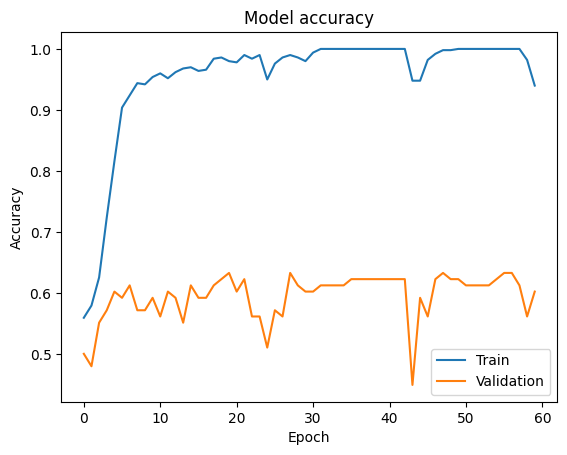

In [59]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


In [ ]:
print(encoded_feature_names)

In [77]:
!pip install seaborn

In [78]:
test_encoded.shape

(140, 16)

70/70 [==============================] - 13s 186ms/step


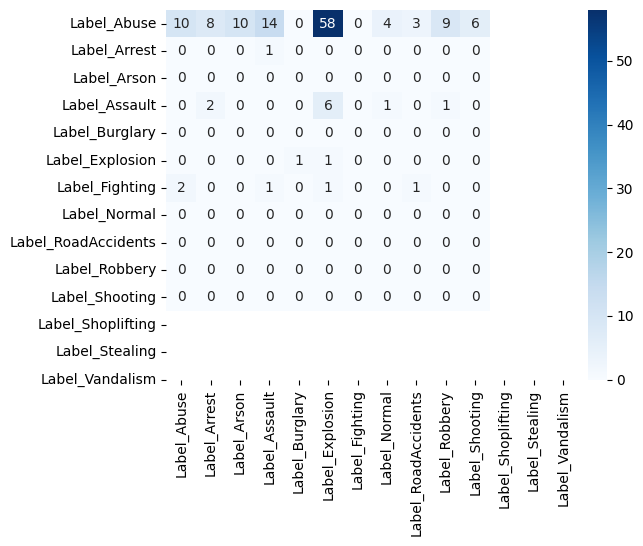

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, classification_report
import seaborn as sns

test_data = np.array(test_encoded['Video Path'])
test_values = np.array(test_encoded.drop(['Video Path', 'Label'], axis=1))
test_generator = VideoDataGenerator(test_data, test_values, batch_size)

test_video_generator = VideoDataGenerator(test_data, test_values, batch_size)

y_pred_one_hot = model.predict(test_video_generator)

# Step 3: Convert one-hot encoded labels and predictions to categorical labels
y_true_categorical = np.argmax(test_values, axis=1)
y_pred_categorical = np.argmax(y_pred_one_hot, axis=1)

# Step 4: Compute and display the confusion matrix
cm = confusion_matrix(y_true_categorical, y_pred_categorical)
classes = encoded_feature_names
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
#disp.plot(cmap='Blues', values_format='d')  # 'd' for integer format
plt.show()


In [29]:
y_pred_categorical

array([7, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 7, 7, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 7, 4, 4, 7, 4, 7, 4, 4, 7, 4])

In [30]:
y_pred_one_hot

array([[2.92314537e-04, 4.79886621e-05, 1.46929406e-05, ...,
        8.09984864e-04, 8.58704001e-03, 5.74955484e-04],
       [1.53776637e-04, 3.47485657e-05, 4.19965386e-03, ...,
        1.62758143e-03, 8.31620675e-03, 5.23366593e-03],
       [2.04077689e-04, 1.97342539e-04, 1.67026964e-03, ...,
        9.36524957e-05, 6.36408979e-04, 9.32502444e-04],
       ...,
       [7.02669993e-02, 8.05147737e-03, 2.62047397e-03, ...,
        2.00212910e-03, 8.36591423e-03, 1.39962672e-03],
       [1.51315350e-02, 2.51601879e-02, 3.97826498e-03, ...,
        2.78631249e-03, 1.05118295e-02, 1.83948372e-02],
       [6.98607619e-05, 8.04225929e-05, 1.16236224e-05, ...,
        3.04838672e-04, 9.15315293e-04, 4.96653328e-03]], dtype=float32)

In [ ]:
model.save("model.h5")

In [52]:
model = tf.keras.models.load_model('/kaggle/input/modelai/model.h5')

In [80]:
report = classification_report(y_true_categorical, y_pred_categorical)
print('Classification Report:\n', report)

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.08      0.15       122
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         0
           7       0.02      0.50      0.03         2
           8       0.00      0.00      0.00         5
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0

    accuracy                           0.08       140
   macro avg       0.08      0.05      0.02       140
weighted avg       0.73      0.08      0.13       140



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.